In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_ as C_

surveys_rootdir = '../../surveys-save/'
filedirs = search_for_filedirs(surveys_rootdir, fext=C_.EXT_SPLIT_LIGHTCURVE)

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir

method = 'spm-mcmc-estw'
filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

LCDataset:
[outliers - samples 10]
(.) obs_samples=541 - min_len=14 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=1.0[days]
(g) obs_samples=260 - min_len=6 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=3.0[days]
(r) obs_samples=281 - min_len=8 - max_dur=376.0[days] - dur(p50)=128.7[days] - cadence(p50)=3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples=1,107 - min_len=7 - max_dur=298.1[days] - dur(p50)=40.5[days] - cadence(p50)=1.0[days]
(g) obs_samples=450 - min_len=0 - max_dur=221.7[days] - dur(p50)=28.0[days] - cadence(p50)=2.9[days]
(r) obs_samples=657 - min_len=4 - max_dur=298.1[days] - dur(p50)=38.9[days] - cadence(p50)=2.9[days]
   |█▏      | SLSN - 7/48 (14.58%)
   |███▊    | SNIa - 23/48 (47.92%)
   |▌       | SN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


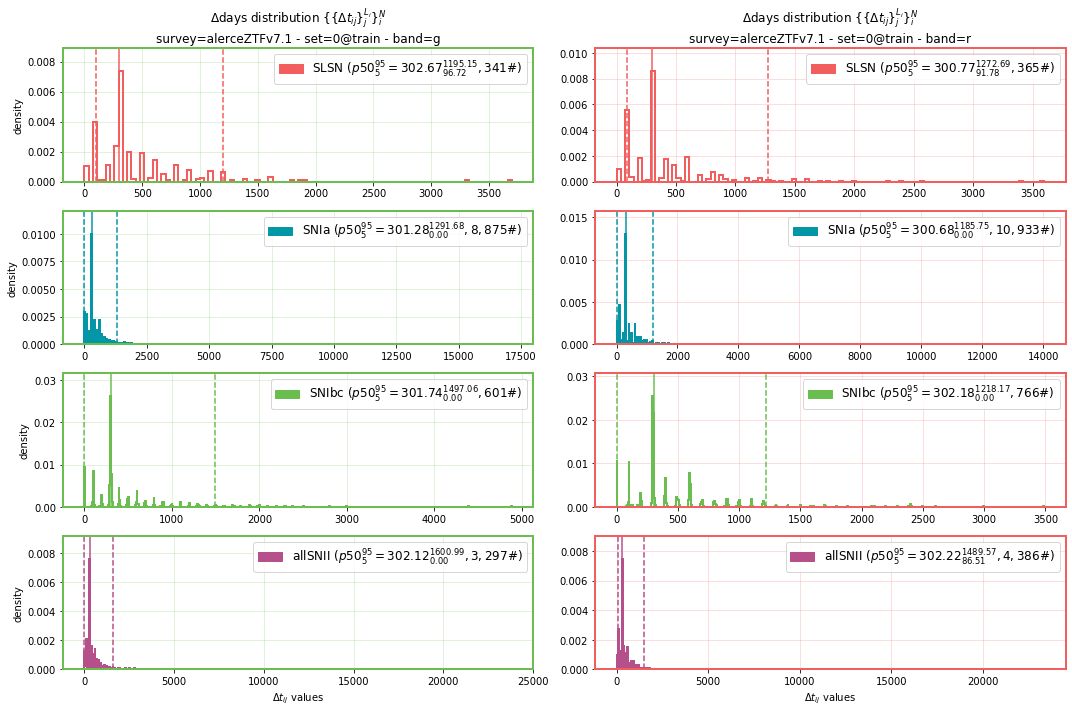

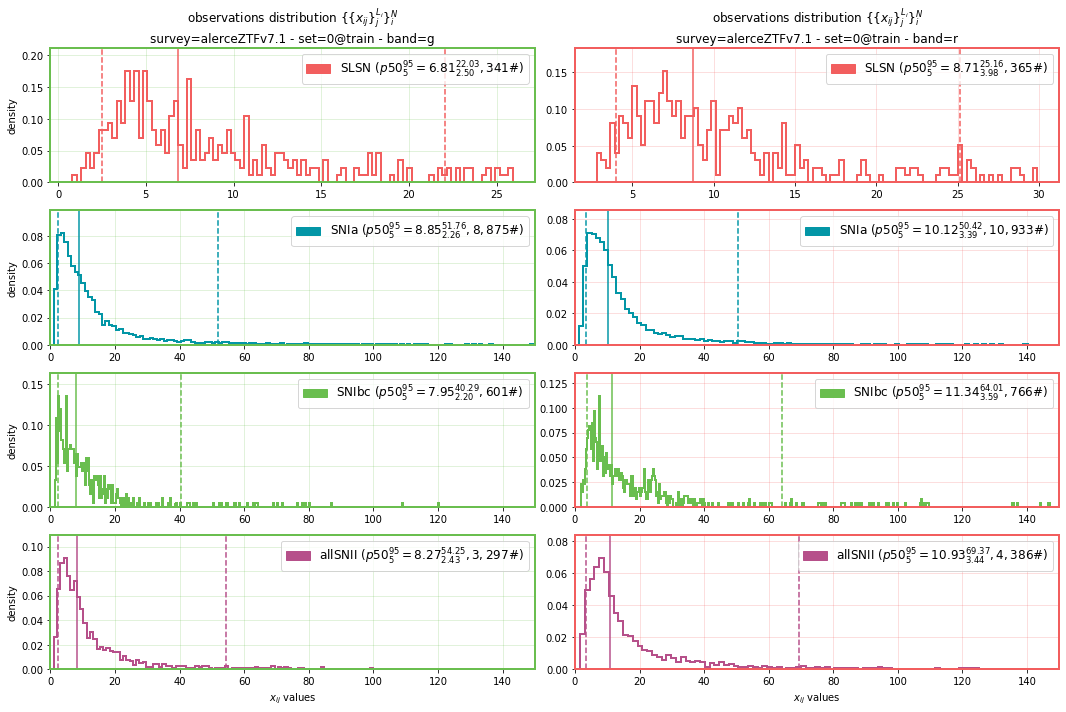

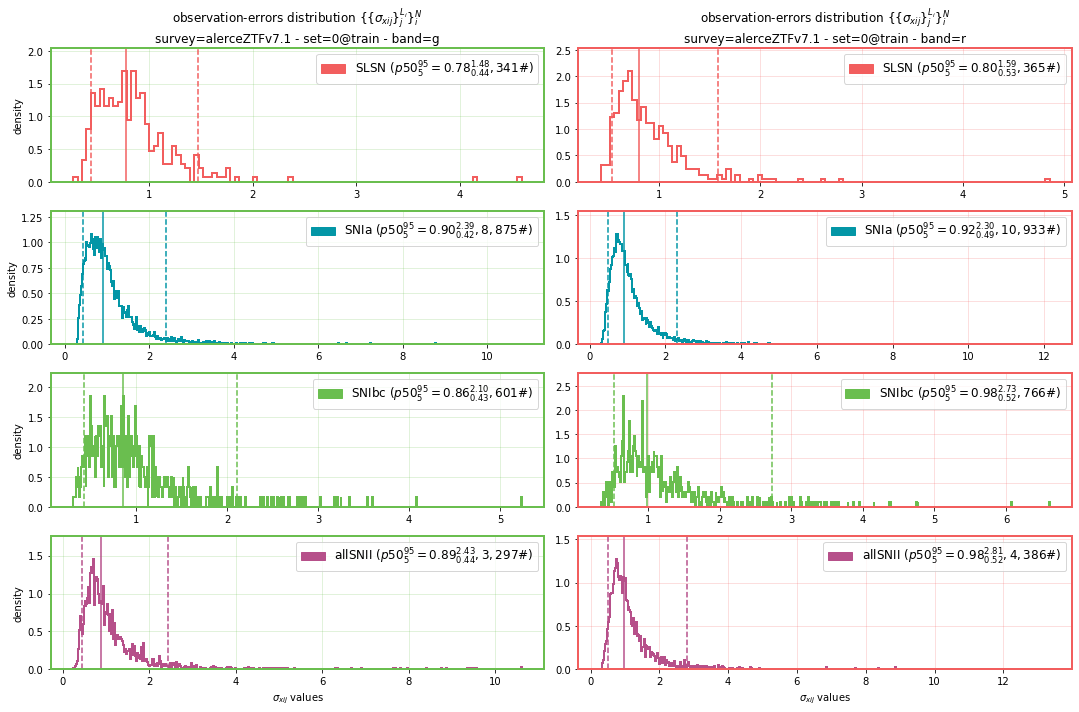

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lchandler.plots.distrs import plot_values_distribution

kf = 0
set_name = f'{kf}@train'
lcdataset[set_name].set_diff_parallel('days')
plot_values_distribution(lcdataset, set_name, 'd_days')
plot_values_distribution(lcdataset, set_name, 'obs')
plot_values_distribution(lcdataset, set_name, 'obse')

In [5]:
%load_ext autoreload
%autoreload 2
from lcclassifier.datasets import CustomDataset

dataset_kwargs = {
    'max_day':150.,
    #'te_features':0,
    'te_features':4,
}
#attrs':['days','obs', 'obse']
in_attrs = ['obs', 'obse']
#'attrs':['d_days','obs', 'obse']
rec_attr = 'obs'
train_dataset = CustomDataset(f'{kf}@train.{method}', lcdataset, in_attrs, rec_attr, **dataset_kwargs)
val_dataset = CustomDataset(f'{kf}@val', lcdataset, in_attrs, rec_attr, **dataset_kwargs)
train_dataset.transfer_metadata_to(val_dataset) # transfer metadata to val/test
print('train_dataset:', train_dataset)
print('val_dataset:', val_dataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
train_dataset: CustomDataset(lcset_len=37,248, max_day=150.00, max_len=203, te_periods=[300.0, 150.0], in_attrs=['obs', 'obse'], rec_attr=obs)
val_dataset: CustomDataset(lcset_len=387, max_day=150.00, max_len=169, te_periods=[300.0, 150.0], in_attrs=['obs', 'obse'], rec_attr=obs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(g:12) - [d:[ 0.87254936  3.01835735  5.00356666 12.97155975 15.05717236 22.09853674
 22.98146563 23.9539691  24.94671369 25.78849886 30.08186017 30.69330836]float64, o:[0.01213818 0.01873058 0.02591688 0.06650426 0.07277016 0.06202702
 0.0565867  0.05475872 0.04670836 0.0461591  0.03185829 0.0269836 ]float64, oe:[0.00265006 0.00495327 0.0054832  0.01303167 0.0081914  0.00886057
 0.00544452 0.00723128 0.01139863 0.0067455  0.00649578 0.00666242]float64]
(r:12) - [d:[ 0.          1.81280701  2.89405969  7.79017251  9.70897934 11.04602375
 20.75552438 22.7855849  24.67982116 33.96190774 35.69918705 40.6667994 ]float64, o:[0.01299451 0.02166326 0.02338886 0.05504137 0.07211321 0.07880059
 0.09408946 0.07946565 0.06838803 0.05299751 0.05225433 0.04837531]float64, oe:[0.00403013 0.00373423 0.00363694 0.00671218 0.00980602 0.01076223
 0.00952762 0.00614027 0.01015941 0.00900447 0.00804154 0.00943294]float

No handles with labels found to put in legend.


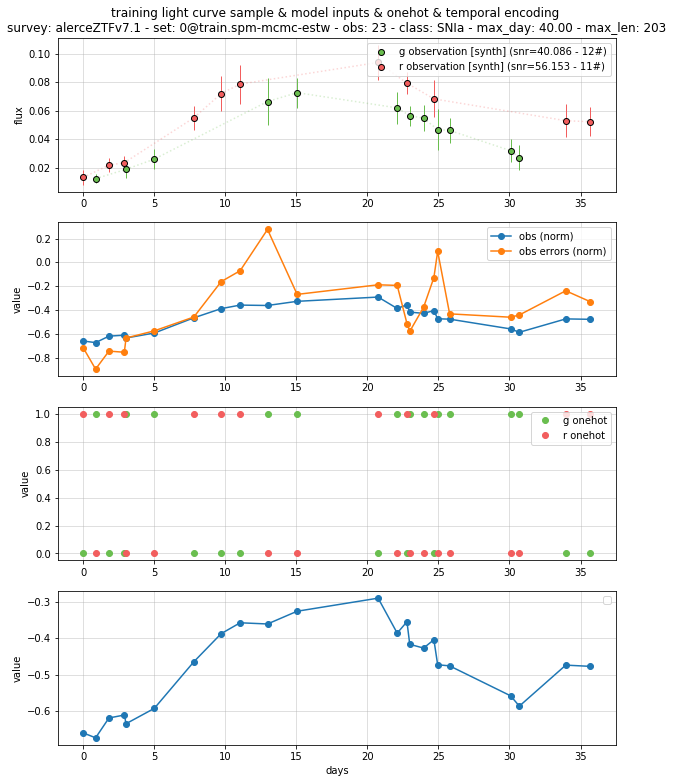

In [24]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve
from lchandler import C_ as C_
import cProfile
%matplotlib inline

dataset = train_dataset
lcobj_name = dataset.get_random_stratified_lcobj_names()[0]

p = cProfile.Profile()
p.enable()
tdict, lcobj = dataset.get_item(lcobj_name, uses_len_clip=False, uses_daugm=False, return_lcobjs=True)
print(lcobj)
p.disable()
p.dump_stats('prof.prof')

model_input = tdict['input']
target = tdict['target']
len_lcobj = model_input['onehot'].sum()

figsize = (10,13)
fig, axs = plt.subplots(4, 1, figsize=figsize)

ax = axs[0]
for kb,b in enumerate(lcobj.bands):
    plot_lightcurve(ax, lcobj, b, label=f'{b} observation', max_day=dataset.max_day)
ax.set_ylabel('flux')
for kb,b in enumerate(lcobj.bands):
    #tmax = target[f'tmax.{b}']
    #label = f'{b} pm tmax - {tmax:.1f}[days]'
    #axs[0].axvline(tmax, ls='-', c=C_.COLOR_DICT[b], label=label)
    pass

ax = axs[1]
days = model_input['time'][...,0]
for ka,in_attr in enumerate(dataset.in_attrs):
    ax.plot(days[:len_lcobj], model_input['x'][:len_lcobj,ka], '-o', label=f'{C_.SHORT_NAME_DICT[in_attr]} (norm)')
ax.set_ylabel('value')

ax = axs[2]
for kb,b in enumerate(lcobj.bands):
    ax.plot(days[:len_lcobj], model_input['onehot'][:len_lcobj,kb], 'o', c=C_.COLOR_DICT[b], label=f'{b} onehot')
ax.set_ylabel('value')

ax = axs[3]
days = model_input['time'][...,0]
ax.plot(days[:len_lcobj], target['rec-x'][:len_lcobj], '-o', label='')
ax.set_ylabel('value')

class_name = dataset.class_names[target['y']]
title = ''
title += f'training light curve sample & model inputs & onehot & temporal encoding \n'
title += f'survey: {dataset.lcset.survey} - set: {dataset.lcset_name}'
title += f' - obs: {len_lcobj} - class: {class_name} - max_day: {dataset.max_day:.2f} - max_len: {dataset.max_len}'
#title += f' - training: {dataset.training}'
for ax in axs:
    #ax.legend(prop={'size':14})
    ax.legend(loc='upper right')
    ax.grid(alpha=0.5)
axs[0].set_title(title)
axs[-1].set_xlabel('days')
plt.show()

In [7]:
%load_ext autoreload
%autoreload 2
from lcclassifier.dataloaders import CustomDataLoader
from fuzzytorch.utils import print_tdict

loader_kwargs = {
    'batch_size':1,
    'num_workers':1,
}
random_subcrops = 3
s_train_loader = CustomDataLoader(train_dataset, shuffle=False, random_subcrops=random_subcrops, **loader_kwargs)
s_train_loader.eval()
dataset.set_max_day(40)

for k,tdict in enumerate(s_train_loader):
    model_input = tdict['input']
    target = tdict['target']
    print_tdict(tdict)
    print(model_input['time'][0,:,0])
    break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{input: {onehot: (1, 203, 2)-bool-cpu, x: (1, 203, 2)-float32-cpu, time: (1, 203, 1)-float32-cpu, dtime: (1, 203, 1)-float32-cpu, error: (1, 203, 1)-float32-cpu}, target: {y: (1)-int64-cpu, rec-x: (1, 203, 1)-float32-cpu}}
tensor([ 0.0000,  3.9147,  5.3479,  6.8879,  8.3735,  9.1114, 11.0225, 13.1533,
        14.9745, 15.3935, 15.6821, 17.9308, 18.8045, 19.3501, 21.3197, 23.4377,
        23.6802, 25.9723, 26.1108, 27.6871, 30.0172, 30.8571, 31.3151, 31.7090,
        33.3307, 34.1618, 34.9597, 35.4097, 39.4195,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.00

In [8]:
%load_ext autoreload
%autoreload 2
from lcclassifier.dataloaders import CustomDataLoader
from fuzzytorch.utils import print_tdict

loader_kwargs = {
    'batch_size':1,
    #'num_workers':1, # bug?
}
random_subcrops = 3
s_train_loader = CustomDataLoader(train_dataset, shuffle=True, random_subcrops=random_subcrops, **loader_kwargs)
s_train_loader.train()

for k,tdict in enumerate(s_train_loader):
    model_input = tdict['input']
    target = tdict['target']
    print_tdict(tdict)
    for idx in range(len(model_input['x'])):
        print(model_input['x'][idx,:,0])
        print(model_input['onehot'][idx].sum(-1))
    assert 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{input: {onehot: (4, 203, 2)-bool-cpu, x: (4, 203, 2)-float32-cpu, time: (4, 203, 1)-float32-cpu, dtime: (4, 203, 1)-float32-cpu, error: (4, 203, 1)-float32-cpu}, target: {y: (4)-int64-cpu, rec-x: (4, 203, 1)-float32-cpu}}
tensor([-0.6687, -0.5367, -0.6219, -0.5131, -0.3635, -0.2790, -0.2053,  0.2302,
         0.7030,  0.4539,  0.7526,  1.4117,  0.8562,  0.8596,  1.2623,  1.2432,
         0.7537,  0.7255,  0.7019,  0.4379,  0.1466,  0.2974,  0.1685,  0.2199,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.00

AssertionError: 